In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [396]:
data=pd.read_csv("C:/Users/dell/Downloads/customer_booking.csv", encoding="ISO-8859-1")

In [397]:
data.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [398]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [399]:
data['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [400]:
trip={    
    'RoundTrip':1,
    'OneWay':2,
    'CircleTrip':3
}
data['trip_type']=data['trip_type'].map(trip)

In [401]:
data['departure']=data['route'].str[:3]
data['destination']=data['route'].str[3:]

In [402]:
lr=LabelEncoder()
data['sales_channel']=lr.fit_transform(data['sales_channel'])
#data['route']=lr.fit_transform(data['route'])

In [403]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
0,2,0,1,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,0,1,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,0,1,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,0,1,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,0,1,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,1,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,0,1,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,0,1,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,0,1,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [404]:
day={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}
data['flight_day']=data['flight_day'].map(day)

In [405]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
departure                0
destination              0
dtype: int64

In [406]:
#data['booking_origin']=lr.fit_transform(data['booking_origin'])

In [407]:
data.shape

(50000, 16)

In [408]:
con=pd.read_csv("C:/Users/dell/Downloads/Compressed/ip2location-iata-icao-master/iata-icao.csv")

In [409]:
columns=['region_name', 'icao', 'latitude','longitude']
con.drop(columns=columns,inplace=True)

In [410]:
con.head()

,country_code,iata,airport
0,AE,SHJ,Sharjah International Airport
1,AE,AZI,Al Bateen Executive Airport
2,AE,FJR,Fujairah International Airport
3,AE,XSB,Sir Bani Yas Airport
4,AE,RKT,Ras Al Khaimah International Airport


In [411]:
con.rename(columns={'iata':'destination','country_code':'destination_country','airport':'arrival_airport'}, inplace=True)
air=pd.merge(data, con,on='destination', how='left')

In [412]:
con.isna().sum()

destination_country    32
destination             0
arrival_airport         0
dtype: int64

In [413]:
con.dropna(inplace=True)

In [414]:
con.rename(columns={'destination':'departure','destination_country':'departure_country','arrival_airport':'departure_airport'}, inplace=True)
df=pd.merge(air, con,on='departure', how='left')

In [458]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'departure', 'destination', 'destination_country', 'arrival_airport',
       'departure_country', 'departure_airport'],
      dtype='object')

In [415]:
df.isna().sum()

num_passengers             0
sales_channel              0
trip_type                  0
purchase_lead              0
length_of_stay             0
flight_hour                0
flight_day                 0
route                      0
booking_origin             0
wants_extra_baggage        0
wants_preferred_seat       0
wants_in_flight_meals      0
flight_duration            0
booking_complete           0
departure                  0
destination                0
destination_country       92
arrival_airport           92
departure_country        733
departure_airport        733
dtype: int64

In [416]:
import pycountry
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    
df['destination_country']=df['destination_country'].apply(country_code_to_name)
df['departure_country']=df['departure_country'].apply(country_code_to_name)

In [417]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination,destination_country,arrival_airport,departure_country,departure_airport
0,2,0,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL,India,Indira Gandhi International Airport,New Zealand,Auckland Airport
1,1,0,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL,India,Indira Gandhi International Airport,New Zealand,Auckland Airport
2,2,0,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL,India,Indira Gandhi International Airport,New Zealand,Auckland Airport
3,1,0,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL,India,Indira Gandhi International Airport,New Zealand,Auckland Airport
4,2,0,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL,India,Indira Gandhi International Airport,New Zealand,Auckland Airport


In [418]:
country={
    'Australia':1,
    'Bangladesh':2,
    'China':3,
    'Province of China':3,
    'Cambodia':4,
    'Brunei Darussalam':5,
    'Indonesia':6,
    'Malaysia':7,
    'Thailand':8,
    'India':9,
    'Korea, Republic of':10,
    'Japan':11,
    'New Zealand':12,
    'Sri Lanka':13,
    'Viet Nam':14,
    'Philippines':15,
    'Hong Kong':16,
    'Myanmar':17,
    'Nepal':18,
    'Iran, Islamic Republic of':19,
    'Mauritius':20,
    'Singapore':21,
    'Maldives':22,
    'Taiwan, Province of China':23,
    'Saudi Arabia':24,
    "Lao People's Democratic Republic":25,
    'United Kingdom':26,
    'South Korea':27,
    'Switzerland':28,
    'Germany':29,
    'Czech Republic':30,
    'Vietnam':14,
    'Spain':31,
    'Romania':32,
    'Ireland':33,
    'Italy':34,
    'Slovakia':35,
    'United Arab Emirates':36,
    'Tonga':37,
    'Réunion':38,
    'Saudi Arabia':39,
    'Netherlands':40,
    'Qatar':41,
    'France':42,
    'Croatia':43,
    'United States':44,
    'Laos':45,
    'Hungary':46,
    'Portugal':47,
    'Cyprus':48,
    'Poland':49,
    'Belgium':50,
    'Oman':51,
    'Bangladesh':52,
    'Kazakhstan':53,
    'Brazil':54,
    'Turkey':55,
    'Taiwan':56,
    'Brunei':57,
    'Chile':58,
    'Bulgaria':59,
    'Ukraine':60,
    'Denmark':61,
    'Colombia':62,
    'Iran':19,
    'Bahrain':63,
    'Solomon Islands':64,
    'Slovenia':65,
    'Nepal':66,
    'Russia':67,
    'Kuwait':68,
    'Mexico':69,
    'Sweden':70,
    'Austria':71,
    'Lebanon':72,
    'Jordan':73,
    'Greece':74,
    'Mongolia':75,
    'Canada':76,
    'Tanzania':77,
    'Peru':78,
    'Timor-Leste':79,
    'Argentina':80,
    'New Caledonia':81,
    'Macau':82,
    'Myanmar (Burma)':17,
    'Norway':83,
    'Panama':84,
    'Bhutan':85,
    'Norfolk Island':86,
    'Finland':87,
    'Nicaragua':88,
    'Egypt':89,
    'Israel':90,
    'Tunisia':91,
    'South Africa':92,
    'Papua New Guinea':93,
    'Paraguay':94,
    'Estonia':95,
    'Seychelles':96,
    'Afghanistan':97,
    'Guam':98,
    'Czechia':99,
    'Malta':100,
    'Vanuatu':101,
    'Belarus':102,
    'Iraq':103,
    'Ghana':104,
    'Svalbard & Jan Mayen':105,
    'Algeria':106,
    'Gibraltar':107,
    'Guatemala':108

 
}

In [419]:
def country_to_num(country_name):
    if country_name in country:
        return country[country_name]
    else:
        return None
    
df['departure_country']=df['departure_country'].apply(country_to_num)
df['destination_country']=df['destination_country'].apply(country_to_num)
df['booking_origin']=df['booking_origin'].apply(country_to_num)
df.dropna(inplace=True)

In [420]:
correlation=df.corr(method='pearson')
target=['booking_complete']
corr_coef=correlation[target]
sorted_coeff = corr_coef.sort_values(by=target)
hr=pd.DataFrame(sorted_coeff).T
hr.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_16276\3482262855.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr(method='pearson')


,flight_duration,sales_channel,length_of_stay,trip_type,purchase_lead,flight_day,flight_hour,departure_country,num_passengers,booking_origin,wants_in_flight_meals,wants_preferred_seat,wants_extra_baggage,destination_country,booking_complete
booking_complete,-0.111914,-0.043232,-0.040646,-0.027511,-0.022742,-0.007186,0.00692,0.017174,0.023427,0.026192,0.02625,0.049157,0.066394,0.086696,1.0


<Axes: >

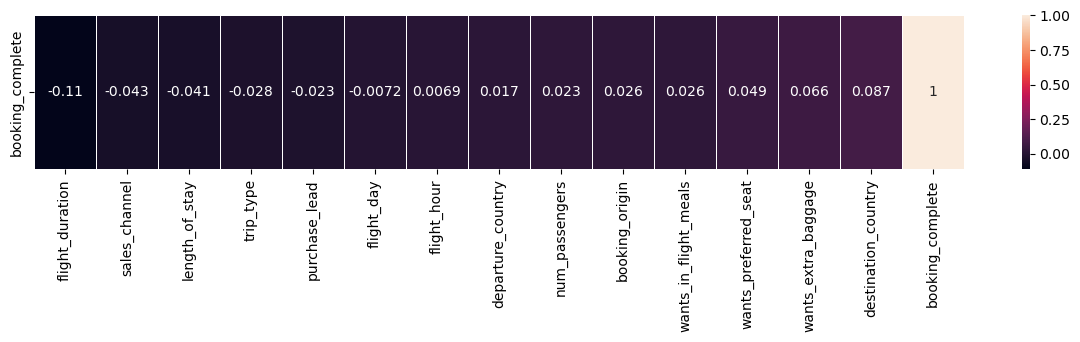

In [421]:
fig, ax= plt.subplots(figsize=(15,2))
sns.heatmap(hr, annot=True, linewidth=.6, ax=ax)

In [422]:
x=df[['flight_hour','departure_country','num_passengers','booking_origin','wants_in_flight_meals','wants_preferred_seat','wants_extra_baggage','destination_country']]

<Axes: >

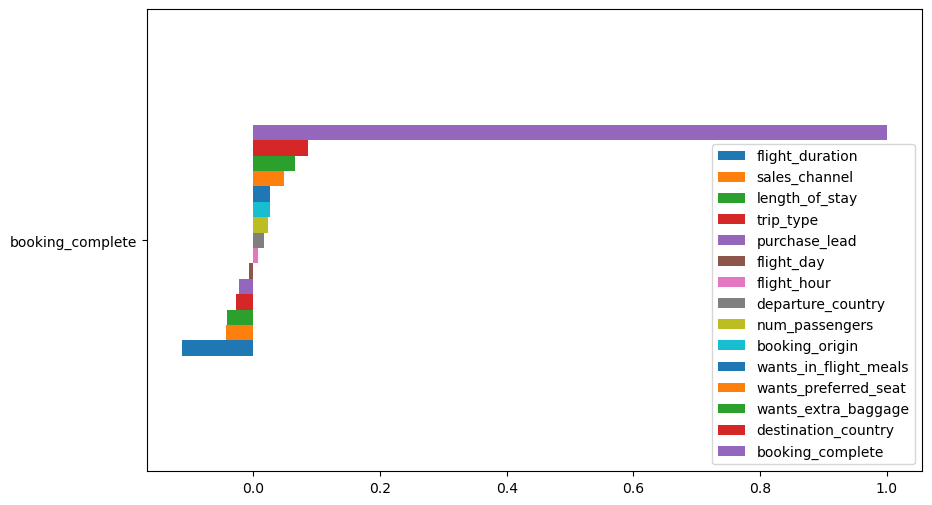

In [423]:
hr.plot(kind='barh', figsize=(10,6))

In [424]:
x=df[['departure_country', 'num_passengers','booking_origin','wants_in_flight_meals','wants_preferred_seat','wants_extra_baggage','destination_country']]

<Axes: xlabel='Features'>

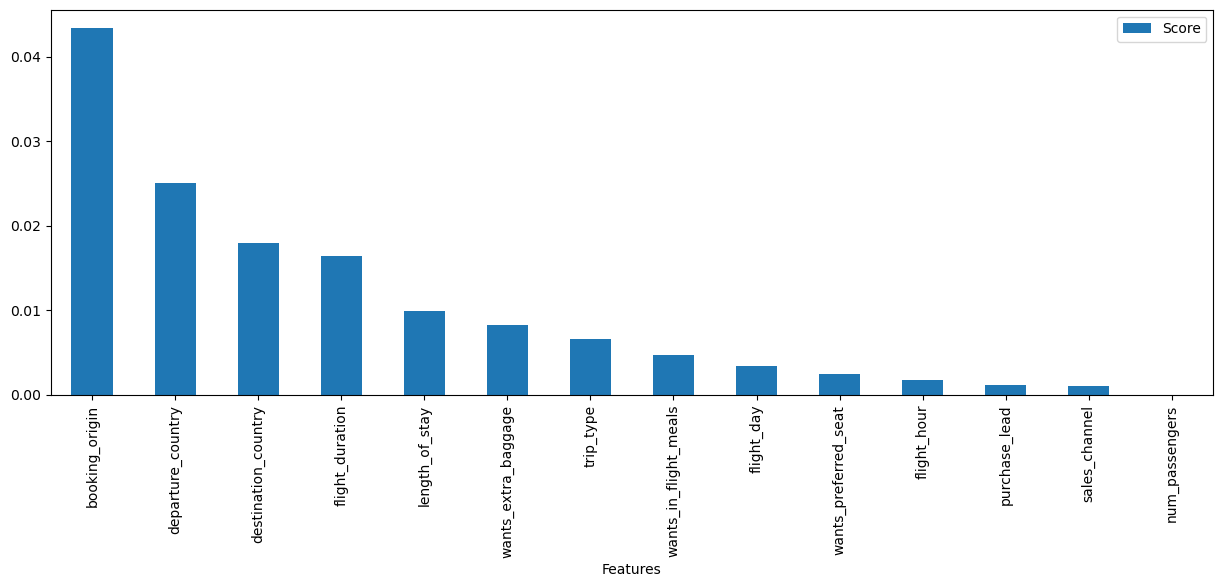

In [425]:
x=df[['departure_country', 'num_passengers','booking_origin','wants_in_flight_meals','wants_preferred_seat','wants_extra_baggage','destination_country']]
from sklearn.feature_selection import mutual_info_classif
y=df['booking_complete']
x=df.drop(columns=['booking_complete','route','departure','destination','arrival_airport','departure_airport'], axis=1)
feature_info=mutual_info_classif(x,y)
feature_df=pd.DataFrame({'Features':x.columns, 'Score':feature_info})
feature_df=feature_df.sort_values(by='Score', ascending=False)
feature_df.index=feature_df['Features']
feature_df.plot(kind='bar',figsize=(15,5))

In [426]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

<h1> Random Forest Model

In [427]:
x=df[['booking_origin','departure_country','flight_duration','destination_country','wants_extra_baggage','length_of_stay','wants_in_flight_meals','flight_day','num_passengers','wants_preferred_seat', 'trip_type']]
y=df['booking_complete']

In [429]:


# Define the number of folds for cross-validation
n_splits = 5

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Initialize an empty list to store cross-validation scores
cv_scores_random = []

best_models=[]

# Perform k-fold cross-validation
for i in range(n_splits):
    # Split the data into training and testing sets using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)

    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate the model's accuracy on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores_random.append(accuracy)
    # Store the best performing model for this fold
    if accuracy == max(cv_scores_random):
        best_models.append(classifier)

# Calculate the average cross-validation score
average_score = sum(cv_scores_random) / len(cv_scores_random)
print(f"Average Cross-Validation Accuracy: {average_score:.3f}")

# Select the overall best model
best_model = best_models[0]
for model in best_models[1:]:
    if model.score(X_test, y_test) > best_model.score(X_test, y_test):
        best_model = model

Average Cross-Validation Accuracy: 0.834


In [433]:
random=pd.DataFrame({'Random Forest (cv scores)':cv_scores_random})
random

,Random Forest (cv scores)
0,0.832057
1,0.838250
2,0.830346
3,0.833442
4,0.835398


<h3>Hyper-parameter Tuning

In [438]:

# Define the hyperparameter grid for random search
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
}


# Perform hyperparameter tuning using RandomizedSearchCV
randomized_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5)
randomized_search.fit(X_train, y_train)

# Get the best parameters
best_params = randomized_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
classifier = RandomForestClassifier(**best_params)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_predic = classifier.predict(X_test)

# Evaluate the model's accuracy on the testing set
accuracy_random = accuracy_score(y_test, y_predic)
print("Accuracy on Testing Set:", accuracy_random)



Best Parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy on Testing Set: 0.8538950456323338


<h1> Decision Tree

In [439]:
# Define the number of folds for cross-validation
n_splits = 5

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# Initialize an empty list to store cross-validation scores
cv_scores_decision = []

best_models=[]

# Perform k-fold cross-validation
for i in range(n_splits):
    # Split the data into training and testing sets using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)

    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate the model's accuracy on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores_decision.append(accuracy)
    # Store the best performing model for this fold
    if accuracy == max(cv_scores_decision):
        best_models.append(classifier)

# Calculate the average cross-validation score
average_score = sum(cv_scores_decision) / len(cv_scores_decision)
print(f"Average Cross-Validation Accuracy: {average_score:.3f}")


Average Cross-Validation Accuracy: 0.788


In [452]:
decision=pd.DataFrame({'Decision Scores':cv_scores_decision})
decision['index']=[1,2,3,4,5]

In [441]:
# Define the number of folds for cross-validation
n_splits = 5

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
}

# Perform hyperparameter tuning using GridSearchCV
cross_val = KFold(n_splits=n_splits, shuffle=True, random_state=42)
search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=cross_val)
search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = search.best_estimator_
best_params = search.best_params_



# Calculate the average cross-validation accuracy
cv_scores = search.cv_results_['mean_test_score']
average_score = sum(cv_scores) / len(cv_scores)
print(f"Average Cross-Validation Accuracy: {average_score:.3f}")

# Select the best model based on the best hyperparameter tuning results
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

y_hat=best_model.predict(X_test)
accuracy_decision=accuracy_score(y_hat, y_test)
print('Accuracy (fine-tuned): ', accuracy_decision)

Average Cross-Validation Accuracy: 0.850
Accuracy (fine-tuned):  0.8538950456323338


<h1> SVM

In [442]:
# Define the number of folds for cross-validation
n_splits = 5

from sklearn import svm
svm_svc=svm.SVC()

# Initialize an empty list to store cross-validation scores
cv_scores_svm = []

best_models=[]

# Perform k-fold cross-validation
for i in range(n_splits):
    # Split the data into training and testing sets using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)

    # Train the classifier on the training set
    svm_svc.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = svm_svc.predict(X_test)

    # Evaluate the model's accuracy on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores_svm.append(accuracy)
    # Store the best performing model for this fold
    if accuracy == max(cv_scores_svm):
        best_models.append(svm_svc)

# Calculate the average cross-validation score
average_score = sum(cv_scores_svm) / len(cv_scores_svm)
print(f"Average Cross-Validation Accuracy: {average_score:.3f}")

svm_df=pd.DataFrame({'SVM':cv_scores_svm})

Average Cross-Validation Accuracy: 0.853


In [455]:
metrics={'Random Forest':cv_scores_random,'Decision Tree':cv_scores_decision,'SVM':cv_scores_svm}

In [461]:
fin=pd.DataFrame(metrics)
fin

,Random Forest,Decision Tree,SVM
0,0.832057,0.782432,0.851125
1,0.838250,0.794410,0.854628
2,0.830346,0.788462,0.850310
3,0.833442,0.785935,0.853162
4,0.835398,0.788543,0.853814


In [460]:
fin.to_csv("C:/Users/dell/Downloads/fin.csv")